# Project 8 - Plant Seedling Classification

Objective

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

Data Description

This dataset contains images of unique plants belonging to 12 different species.

The data file names are:
- images.npy
- Label.csv

Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.

The **goal** of the project is to create a classifier capable of determining a plant's species from an image.

List of Plant species

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet


In [1]:
!pip freeze

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.8
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Necessary libraries
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Libraries to calculate model performance
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Augmentation library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Library to clear backend
from tensorflow.keras import backend

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, SpatialDropout2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint

# Import prebuilt model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

# Load Dataset and Summary
- Read the dataset properly 
- Print the overview of the data (shape, checking the proportion of each class) 
- Plot the images from each class and print their corresponding labels.

## Load Dataset

In [ ]:
# import numpy array for images
x = np.load('/content/drive/MyDrive/Colab Notebooks/PGP in AI and ML/Project_8/images.npy')
# import image labels
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PGP in AI and ML/Project_8/Labels.csv')

In [ ]:
# Print shape
x.shape

(4750, 128, 128, 3)

We have 4,750 images with shape 128x128 pixels and 3 color channels.

In [ ]:
# Number of unique labels in our dateset
y.nunique()

Label    12
dtype: int64

We have 12 different plant species in our dataset

In [ ]:
# Check target variable proportions
print('Proportions of each class:')
y.value_counts()/y.shape[0]

Proportions of each class:


Label                    
Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Common wheat                 0.046526
Maize                        0.046526
dtype: float64

Note: Majority of the classes are made up of Loose Silky-bent, Common Chickweed, Scentless Mayweed, Small-flowered Cranesbill, and Fat hen. Imbalanced dataset overall

## Sample Images
Plot sample images from each class

In [ ]:
# Creating list of random images from each label to plot
# Initialize lists to store random images and label
sample_img = []
sample_label = []

# Loop through dataset to get a random image from each class
for name in y['Label'].unique():
  idx = y[y['Label']==name].index.to_list()
  idx_r = np.random.choice(idx)
  sample_img.append(x[idx_r])
  sample_label.append(y['Label'].iloc[idx_r])

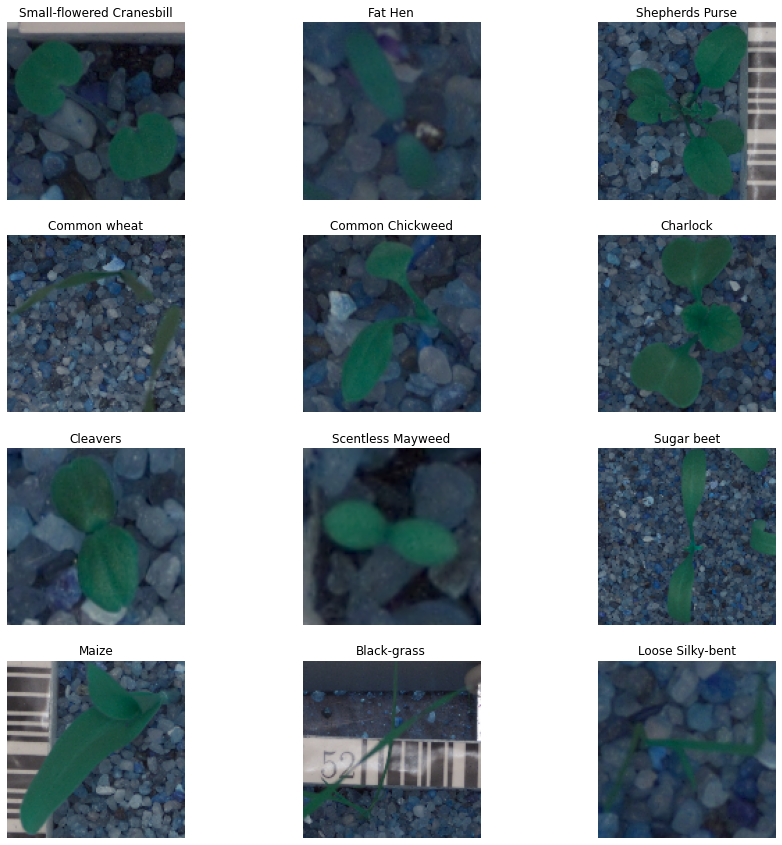

In [ ]:
# Print images
fig = plt.figure(figsize=(15,15))

# Plotting each image using load_img function
for i, img in enumerate(sample_img):
  # add subplot
  ax = fig.add_subplot(4,3,i+1)
  # plot image
  plt.imshow(img)
  # set title to plant name
  ax.set_title(sample_label[i])
  # turn off axis 
  plt.axis('off')

plt.show()

Notes:

We can see from the images that the plants differ in:
- number of petals
- petal length and shape 
- Color (more so shade of green)
- Overall shape

# Exploratory Data Analysis
- Count Plot for each category 
- Any other exploratory deep dive

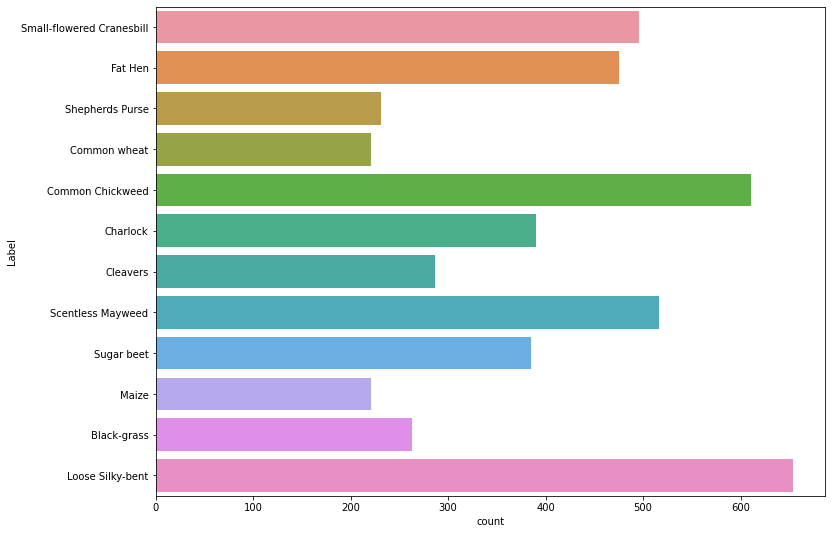

In [ ]:
# Count plot of categories 
plt.figure(figsize=(12,9))
sns.countplot(data=y,y='Label');

Looking at our plot, the most common plant specie in our dataset is Loose Silky-bent followed by Common Chickweed and Scentless Mayweed.

## Insights and Observations


- 12 different plant species in our dataset
- Data set is imbalanced but the top three species found are Loose Silky-bent, Common Chickweed and Scentless Mayweed
- Plant species differ in:
  - number of petals
  - petal length and shape 
  - Color (more so shade of green)
  - Overall shape

# Data Pre-Processing
- Try to remove unwanted noise from the images using Gaussian Blurring 
- Apply the normalization 
- Plot the images before and after the pre-processing steps 
- Split the data into train and test

## Gaussian Blurring
This section will apply gaussian blur on our image set to reduce the amount of noise. This will remove low-intensity edges and hide certain details in the images where necessary. Before applying to our dataset, I want to test out different kernel sizes on our dataset to see which set of parameters I want to use.

In [ ]:
# Splitting into train and test split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1, stratify=y)

In [ ]:
# Apply gaussin blur on the sample_img with ksize = 3x3
blur1 = [cv2.GaussianBlur(img, ksize=(3,3),sigmaX=0) for img in sample_img]

# Apply gaussin blur on the sample_img with ksize= 5x5
blur2 = [cv2.GaussianBlur(img, ksize=(5,5), sigmaX=0) for img in sample_img]

# Apply gaussin blur on the sample_img with ksize = 7x7
blur3 = [cv2.GaussianBlur(img, ksize=(7,7), sigmaX=0) for img in sample_img]


(-0.5, 127.5, 127.5, -0.5)

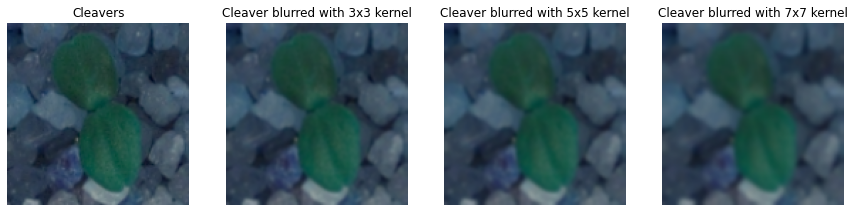

In [ ]:
# Plot original vs blurred images of cleavers. Chose just one of the plant species instead of all 48 for simplicity

fig = plt.figure(figsize=(15,15))

# Add original image to subplot
ax = fig.add_subplot(1,4,1)
plt.imshow(sample_img[6])
ax.set_title(sample_label[6])
plt.axis('off')

# Add first blurred image
ax = fig.add_subplot(1,4,2)
plt.imshow(blur1[6])
ax.set_title('Cleaver blurred with 3x3 kernel')
plt.axis('off')

# Add second blurred image
ax = fig.add_subplot(1,4,3)
plt.imshow(blur2[6])
ax.set_title('Cleaver blurred with 5x5 kernel')
plt.axis('off')

# Add final blurred image
ax = fig.add_subplot(1,4,4)
plt.imshow(blur3[6])
ax.set_title('Cleaver blurred with 7x7 kernel')
plt.axis('off')

As expected we see more blurring as the kernel size increases and notice that more sharp features are lost with each increase. For this dataset, I will use 3x3 kernel because I think it does a nice job removing low-intensity features but not loosing defining features

In [ ]:
# Apply Gaussian Blur to training set
X_train_blur = [cv2.GaussianBlur(img,ksize=(3,3), sigmaX=0) for img in X_train]
X_train_blur = np.array(X_train_blur)

# Apply to test set
X_test_blur = np.array([cv2.GaussianBlur(img, ksize=(3,3), sigmaX=0) for img in X_test])

## Normalization

In [ ]:
# Normalize predictors
X_train_norm = X_train_blur.astype('float32')/255.0
X_test_norm = X_test_blur.astype('float32')/255.0

Original Image of Small-flowered Cranesbill



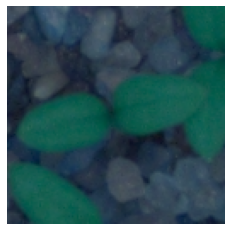

Preprocessed Image of Small-flowered Cranesbill



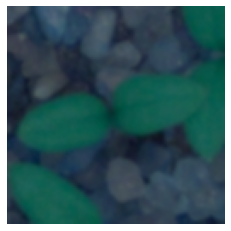

In [ ]:
# Plotting image before processing
print(f'Original Image of {y_train.Label[48]}\n')
plt.imshow(X_train[48])
plt.axis('off')
plt.show()
# Plotting image after processing
print(f'Preprocessed Image of {y_train.Label[48]}\n')
plt.imshow(X_train_norm[48])
plt.axis('off')
plt.show()

We can see the effects of preprocessing on a sample from our dataset


# Make Data Compatible
- Convert labels from digits to one hot vector. 
- Check the shape of the data. Reshape the data into shapes compatible with Keras models, if already not compatible.

In [ ]:
# Encode our target varialbe
Encoder = LabelBinarizer()
Encoder.fit(y_train)
y_train_encoded = Encoder.transform(y_train)
y_test_encoded = Encoder.transform(y_test)

In [ ]:
# Create list of classes in order of the encoder for later use
labels = Encoder.classes_

In [ ]:
# Check shape of encoded targets to make sure it's compatible
y_train_encoded.shape

(4275, 12)

Encoded targets are compatible as we can see with the size having 12 columns (representative of how many different plant species we have

# Model building
- Build Convolution Neural Network 
- Use different layers in the model

First model will be our baseline sequential model which will not utilize any regularization, batch norm, drop out or augmentation techniques

In [ ]:
# Clear backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# CNN MODEL

# Initialize Sequential Model
model0 = Sequential()

# Add first set of convolution layers with 64 filters with kernel size 3x3 and utilizing same option for padding
model0.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(128,128,3)))
model0.add(Conv2D(64, (3,3), activation='relu', padding='same'))
# Add first max pooling layer 
model0.add(MaxPooling2D((2,2), padding='same'))

# Add second set of convolution layers with 32 filters and kernel size 3x3
model0.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model0.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model0.add(MaxPooling2D((2,2), padding='same'))

# Flatten output of convolution layer 
model0.add(Flatten())

# Adding a fully connected dense layer    
model0.add(Dense(32, activation='relu'))
model0.add(Dense(16, activation='relu'))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model0.add(Dense(12, activation='softmax'))

# Compile model
model0.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
# Print model summary
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                    

We have a total of 4,269,900 parameters and all of them are trainable

In [ ]:
# Train Model
history = model0.fit(
    X_train_norm, 
    y_train_encoded, 
    validation_split=0.20,
    epochs=15, 
    batch_size=32,
    verbose=2
)

Epoch 1/15
107/107 - 20s - loss: 2.4122 - accuracy: 0.1532 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 2.2197 - val_accuracy: 0.3029 - val_recall: 0.0281 - val_precision: 0.8889 - 20s/epoch - 188ms/step
Epoch 2/15
107/107 - 6s - loss: 1.9718 - accuracy: 0.3573 - recall: 0.0956 - precision: 0.6812 - val_loss: 1.7532 - val_accuracy: 0.3649 - val_recall: 0.2164 - val_precision: 0.6655 - 6s/epoch - 52ms/step
Epoch 3/15
107/107 - 6s - loss: 1.6155 - accuracy: 0.4228 - recall: 0.2249 - precision: 0.6740 - val_loss: 1.4964 - val_accuracy: 0.4982 - val_recall: 0.2187 - val_precision: 0.7480 - 6s/epoch - 52ms/step
Epoch 4/15
107/107 - 5s - loss: 1.2958 - accuracy: 0.5480 - recall: 0.3450 - precision: 0.7347 - val_loss: 1.3628 - val_accuracy: 0.5404 - val_recall: 0.3602 - val_precision: 0.7605 - 5s/epoch - 51ms/step
Epoch 5/15
107/107 - 5s - loss: 1.1584 - accuracy: 0.5909 - recall: 0.4368 - precision: 0.7615 - val_loss: 1.3203 - val_accuracy: 0.5497 - val_recall: 0.3883 - val_preci

## Model Evaluation
Each model will be evaluated based on accuracy and I'll also look at the recall score for this project to get more insight into how our model performs.

For this project, we need to reduce the false negatives of our model to optimize identifying if a plant is growing properly and reduce the amount of manual labor required to check.

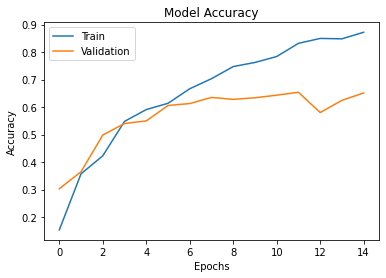

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

We can tell from our plot that our model is overfitting. 

In [ ]:
# Evaluate model on test data
[loss, acc, recall, precision] = model0.evaluate(X_test_norm, y_test_encoded, verbose=2)
print('\nModel Accuracy is {}'.format(acc))

15/15 - 1s - loss: 1.5606 - accuracy: 0.6316 - recall: 0.6021 - precision: 0.6590 - 786ms/epoch - 52ms/step

Model Accuracy is 0.6315789222717285


Baseline model doesn't perform well on the test set as it only 63% accuracte. We can also see that we have low recall too

In [ ]:
# Saving model performance 
model_perf = pd.DataFrame(
    {
    'Accuracy': acc, 
    'Recall': recall, 
    'Precision': precision
     }, 
    index=['Baseline'])

In [ ]:
# Make predictions
y_pred = model0.predict(X_test_norm)

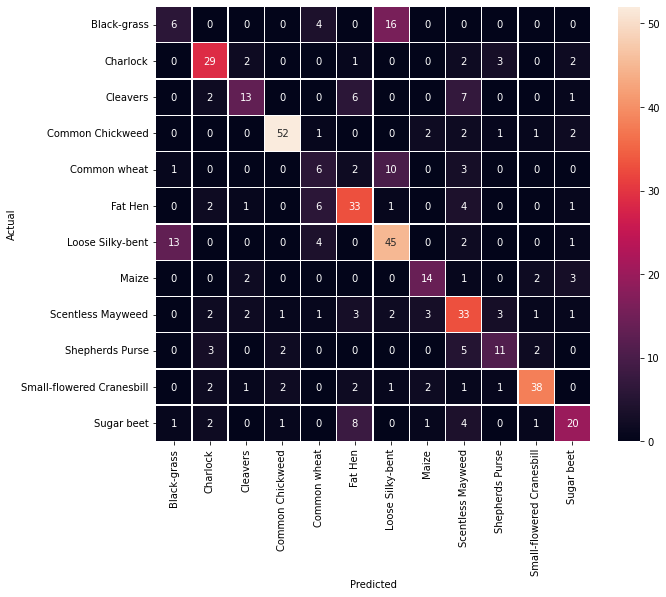

In [ ]:
# Plot confusion matrix

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix 
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax, 
    xticklabels=labels,
    yticklabels=labels
)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Looking at the heatmap we can see some common mispredictions the model is making. For instance the model misclassifies Black-grass as Loose Silky-bent 16 times out of the total number of black-grass test images. From our images from our EDA we can see that there are some features of the plant species that are similar (number of petals, color, and the length and width are somewhat similar) so our model needs improvements to better extract features for each different species. We see the same with loose silky-bent being misclassified as black-grass and common wheat being classified as loose silky-bent.

This isn't surprising since we saw earlier that our recall score for the baseline model was low.

# Model Improvement
This section will work through different techniques to improve our model performance. The following three techniques will be used to improve performance

1. Deeper Network Topology
2. Image Data Augmentation (Please try this)
3. Transfer Learning

## Deeper Network Topology
Here I'll implement batch normilzation and spatial dropout to see if our model improves

In [ ]:
# Clear backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# CNN MODEL

# Initialize Sequential Model
model1 = Sequential()

# Add first set of convolution layers with 64 filters with kernel size 3x3 and utilizing same option for padding
model1.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(128,128,3)))
# Add batch norm layer
model1.add(BatchNormalization())
# Add activation layer 
model1.add(Activation('relu'))
# Add max pooling layer 
model1.add(MaxPooling2D((2,2), padding='same'))
# Add Spatial Dropout layer
model1.add(SpatialDropout2D(0.20))

# Add another set of convolution layers with 32 filters and kernel size 3x3
model1.add(Conv2D(64, (3,3), activation='relu', padding='same'))
# Add activation layer
model1.add(Activation('relu'))
# Add max pooling layer 
model1.add(MaxPooling2D((2,2), padding='same'))
# Add Spatial Dropout layer
model1.add(SpatialDropout2D(0.20))

# Add another set of convolution layers with 32 filters and kernel size 3x3
model1.add(Conv2D(16,(3,3), activation='relu', padding='same'))
model1.add(Conv2D(16,(3,3), activation='relu', padding='same'))

# Adding last set of conv. layers before flattening
model1.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128,128,3)))
# Add batch norm layer
model1.add(BatchNormalization())
# Add activation layer 
model1.add(Activation('relu'))
# Add max pooling layer 
model1.add(MaxPooling2D((2,2), padding='same'))
# Add Spatial Dropout layer
model1.add(SpatialDropout2D(0.15))

# Flatten output of convolution layer 
model1.add(Flatten())

# Adding a fully connected dense layer    
model1.add(Dense(32, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(16, activation='relu'))
# Adding the output layer  
model1.add(Dense(12, activation='softmax'))

# Compile model
model1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
# Print model summary
model1.summary()

# Train Model
history1 = model1.fit(
    X_train_norm, 
    y_train_encoded, 
    validation_split=0.20,
    epochs=15, 
    batch_size=32,
    verbose=2
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 spatial_dropout2d (SpatialD  (None, 64, 64, 64)       0         
 ropout2D)                                                       
                                                        

Model has 318,332 total parameters but only 318,076 are trainable

### Model Evaluation

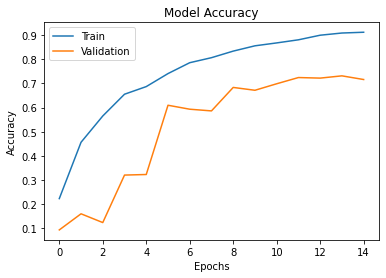

In [ ]:
# Plot training and validation accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Accuracy isn't really better than what we saw before.

In [ ]:
# Evaluate model on test data
[loss, acc, recall, precision] = model1.evaluate(X_test_norm, y_test_encoded, verbose=2);

# Saving model performance 
model_perf2 = pd.DataFrame(
    {
    'Accuracy': acc, 
    'Recall': recall, 
    'Precision': precision
     },
     index=['BN and DropOut CNN'])

15/15 - 0s - loss: 1.0767 - accuracy: 0.7011 - recall: 0.6568 - precision: 0.7429 - 471ms/epoch - 31ms/step


In [ ]:
# Compare second model performance on test with baseline
print('\nBaseline Performance:')
print(model_perf)

print('Deeper CNN Performance:')
print(model_perf2)


Baseline Performance:
          Accuracy    Recall  Precision
Baseline  0.631579  0.602105   0.658986
Deeper CNN Performance:
                    Accuracy    Recall  Precision
BN and DropOut CNN  0.701053  0.656842   0.742857


We can see that our second model performs better than our baseline as our accuracy and recall score is better. Seems like the batch normalization and drop out layers we added improved performance

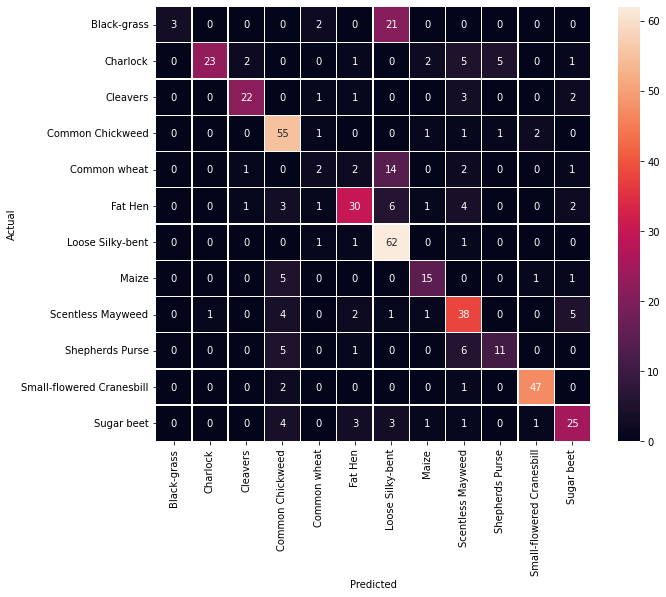

In [ ]:
# Make predictions
y_pred = model1.predict(X_test_norm)

# Plot confusion matrix

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix 
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax, 
    xticklabels=labels,
    yticklabels=labels
)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Observation:

- See the same misclassification with with black-grass and loose silky-bent and this model actually performs worse for that plant species
- The model also performs worse for the common wheat plant species with this model

## Augmentation

For this section, I will augment our data with the following parameters to improve our models performance:

**1. Horizontal Flip** <br>
**2. Vertical Flip** <br>
**3. Height Shift** 0.1 <br>
**4. Width Shift** 0.1 <br>
**5. Rotation** 20 <br>

In [ ]:
# Splitting current training set up into a training subset and validation set
# Data Augmentation shouldn't be used on val or test

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train_norm,y_train_encoded, test_size=0.1, random_state=1,stratify=y_train_encoded)

In [ ]:
# Clear backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True, 
    height_shift_range= 0.1, 
    width_shift_range=0.1, 
    rotation_range=20,
    fill_mode='nearest' 
    )

In [ ]:
# CNN MODEL

# Initialize Sequential Model
model2 = Sequential()

# Add first set of convolution layers with 64 filters with kernel size 3x3 and utilizing same option for padding
model2.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(128,128,3)))
# Add batch norm layer
model2.add(BatchNormalization())
# Add activation layer 
model2.add(Activation('relu'))
# Add max pooling layer 
model2.add(MaxPooling2D((2,2), padding='same'))
# Add Spatial Dropout layer
model2.add(SpatialDropout2D(0.20))

# Add another set of convolution layers with 32 filters and kernel size 3x3
model2.add(Conv2D(64, (3,3), activation='relu', padding='same'))
# Add activation layer
model2.add(Activation('relu'))
# Add max pooling layer 
model2.add(MaxPooling2D((2,2), padding='same'))
# Add Spatial Dropout layer
model2.add(SpatialDropout2D(0.20))

# Add another set of convolution layers with 32 filters and kernel size 3x3
model2.add(Conv2D(16,(3,3), activation='relu', padding='same'))
model2.add(Conv2D(16,(3,3), activation='relu', padding='same'))

# Adding last set of conv. layers before flattening
model2.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128,128,3)))
# Add batch norm layer
model2.add(BatchNormalization())
# Add activation layer 
model2.add(Activation('relu'))
# Add max pooling layer 
model2.add(MaxPooling2D((2,2), padding='same'))
# Add Spatial Dropout layer
model2.add(SpatialDropout2D(0.15))

# Flatten output of convolution layer 
model2.add(Flatten())

# Adding a fully connected dense layer    
model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(16, activation='relu'))
# Adding the output layer  
model2.add(Dense(12, activation='softmax'))

# Compile model
model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
# Print model summary
model2.summary()

# Fit to augmented training data
history2 = model2.fit(train_datagen.flow(X_train_new,y_train_new,
                                       batch_size=32, 
                                       seed=42,
                                       shuffle=False),
                    epochs=15,
                    steps_per_epoch=X_train_new.shape[0] // 32,
                    validation_data=(X_val,y_val),
                    verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 spatial_dropout2d (SpatialD  (None, 64, 64, 64)       0         
 ropout2D)                                                       
                                                        

### Model Evaluation

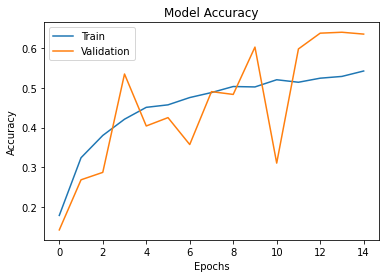

In [ ]:
# Plot training and validation accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Notice a lot more variability with our val accuracy on this model

In [ ]:
# Evaluate model on test data
[loss, acc, recall, precision] = model2.evaluate(X_test_norm, y_test_encoded, verbose=2);

# Saving model performance 
model_perf3 = pd.DataFrame(
    {
    'Accuracy': acc, 
    'Recall': recall, 
    'Precision': precision
     },
     index=['Augmentation'])

15/15 - 0s - loss: 0.7829 - accuracy: 0.7347 - recall: 0.6168 - precision: 0.8371 - 205ms/epoch - 14ms/step


In [ ]:
# Compare second model performance on test with baseline
print('Performance')
print('--'*50)
print(model_perf)
print(model_perf2)
print(model_perf3)

Performance
----------------------------------------------------------------------------------------------------
          Accuracy    Recall  Precision
Baseline  0.631579  0.602105   0.658986
                    Accuracy    Recall  Precision
BN and DropOut CNN  0.701053  0.656842   0.742857
              Accuracy    Recall  Precision
Augmentation  0.734737  0.616842   0.837143


Augmentation improved accuracy of our model but our recall score is worse than the second model so the confusion matrix will allow us to better evaluate how it performed.

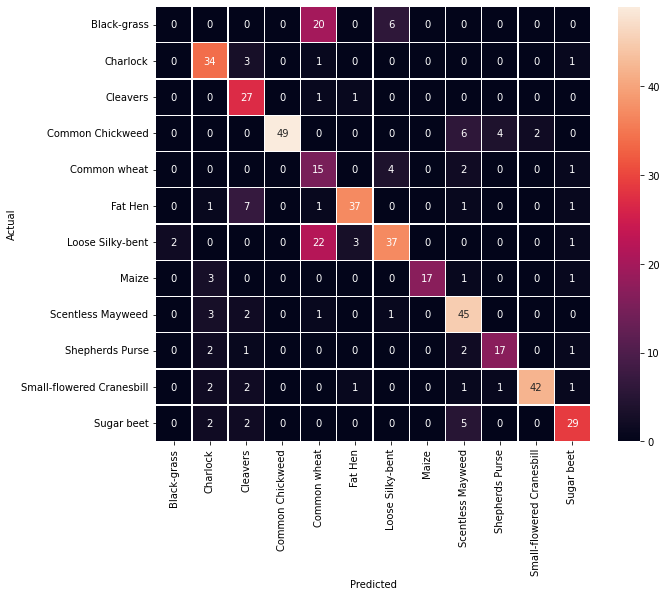

In [ ]:
# Make predictions
y_pred = model2.predict(X_test_norm)

# Plot confusion matrix

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix 
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax, 
    xticklabels=labels,
    yticklabels=labels
)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

This model failed to classify black-grass plant species and performs worse with loose silky-bent and a few others

##VGG16
This section will explore how well the pre-built VGG16 performs for our plant species

In [ ]:
# Clear backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initialize the VGG model
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (128,128,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
# Freezing all layers in the model 
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
# Initialize our new model
model3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model3.add(vgg_model)

# Flattening the output 
model3.add(Flatten())

# Adding a dense output layer
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(12, activation='softmax'))

# Compile model
model3.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

# Generating the summary of the model
model3.summary()

# Fit to augmented training data
history3 = model3.fit(train_datagen.flow(X_train_new,y_train_new,
                                       batch_size=32, 
                                       seed=42,
                                       shuffle=False),
                    epochs=15,
                    steps_per_epoch=X_train_new.shape[0] // 32,
                    validation_data=(X_val,y_val),
                    verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 12)                3084      
                                                                 
Total params: 16,880,972
Trainable params: 16,880,972
No

### Model Evaluation

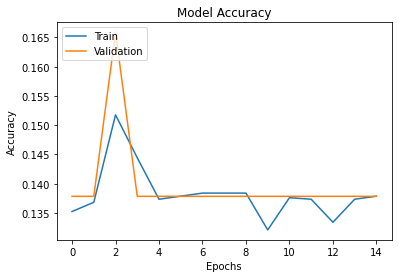

In [ ]:
# Plot training and validation accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

We can see some variabilty but the model doesn't seem to be overfitting as much as our previous models

In [ ]:
# Evaluate model on test data
[loss, acc, recall, precision] = model3.evaluate(X_test_norm, y_test_encoded, verbose=2);

# Saving model performance 
model_perf4 = pd.DataFrame(
    {
    'Accuracy': acc, 
    'Recall': recall, 
    'Precision': precision
     },
     index=['VGG'])

15/15 - 2s - loss: 2.4152 - accuracy: 0.1368 - recall: 0.0000e+00 - precision: 0.0000e+00 - 2s/epoch - 132ms/step


In [ ]:
# Compare second model performance on test with baseline
print('Performance')
print('--'*50)
#print(model_perf)
#print(model_perf2)
#print(model_perf3)
print(model_perf4)

Performance
----------------------------------------------------------------------------------------------------
     Accuracy  Recall  Precision
VGG  0.136842     0.0        0.0


VGG performs the best out of all of our models. It has the highest accuracy and best recall score. 

15/15 [==============================] - 1s 51ms/step


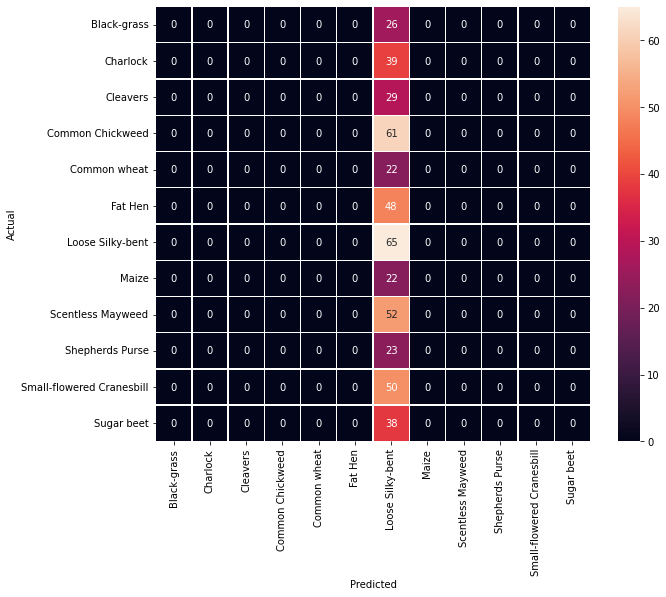

In [ ]:
# Make predictions
y_pred = model3.predict(X_test_norm)

# Plot confusion matrix

# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix 
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax, 
    xticklabels=labels,
    yticklabels=labels
)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


We can see from the confusion matrix that this model performs is able to classify the plant species better for each species than the other models and can be beneficial for the group

# Conclusion and Key Takeaways
Final conclusion about the analysis

- Model performance could be improved by investigating different kernel and filter sizes
- Seeing how the pre-built architecture performed better than ther rest, it would be recommended to investigate how other pre-built archs would perform at classifying plant species
- There's also imbalance in the dataset so exploring different techniques such as over or undersampling would be recommended
- I would still recommend the group use the VGG based model to sort and recognize different plants to start reducing the amount of manual labor

# Productionize

In [ ]:
import os
import pickle

In [ ]:
# Change to working dir
os.chdir('/content/drive/MyDrive/Colab Notebooks/PGP in AI and ML/Project_8/')

In [ ]:
# Save model with pickle
filename = 'Plant_classifier.pkl'
pickle.dump(model3, open(filename, 'wb'))